In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!kaggle datasets download -d harlfoxem/housesalesprediction


  0%|          | 0.00/780k [00:00<?, ?B/s]
100%|##########| 780k/780k [00:01<00:00, 643kB/s]
100%|##########| 780k/780k [00:01<00:00, 643kB/s]


In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


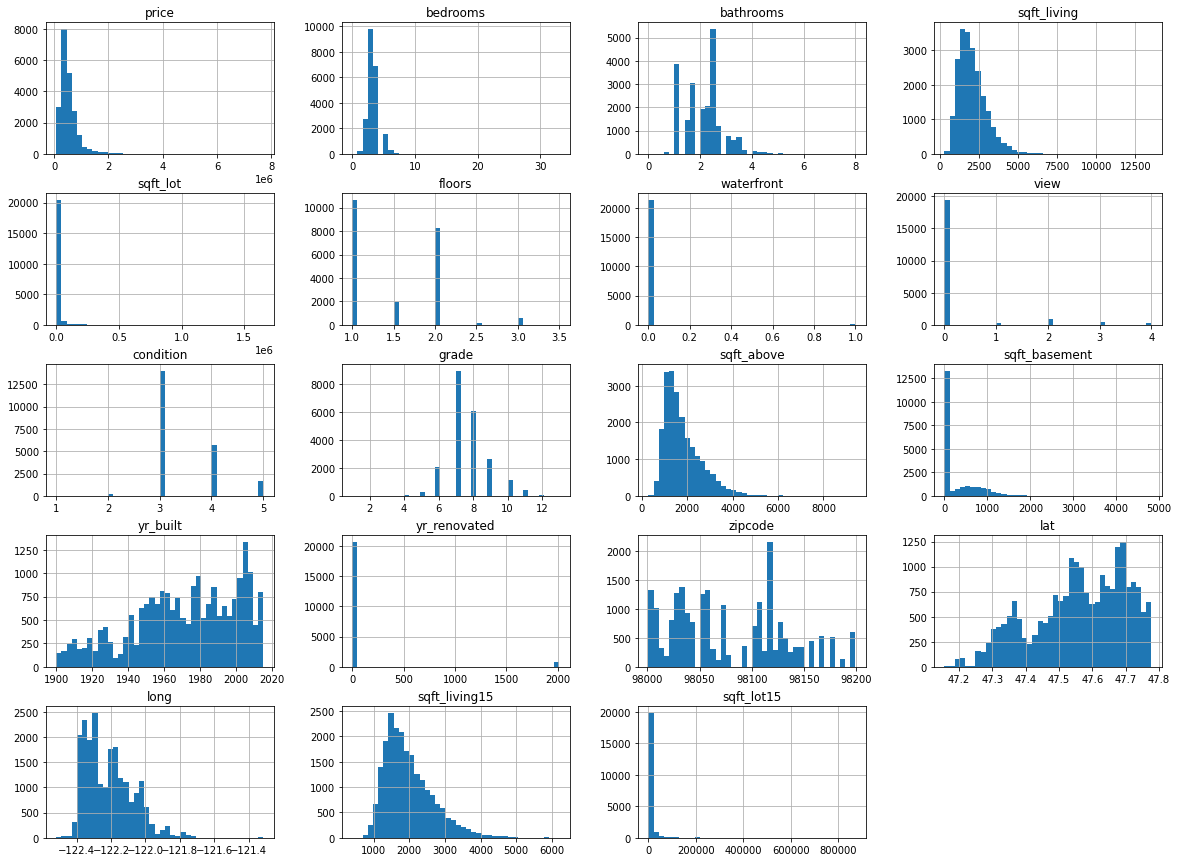

In [9]:
df.hist(bins=40, figsize=(20,15))
plt.show()

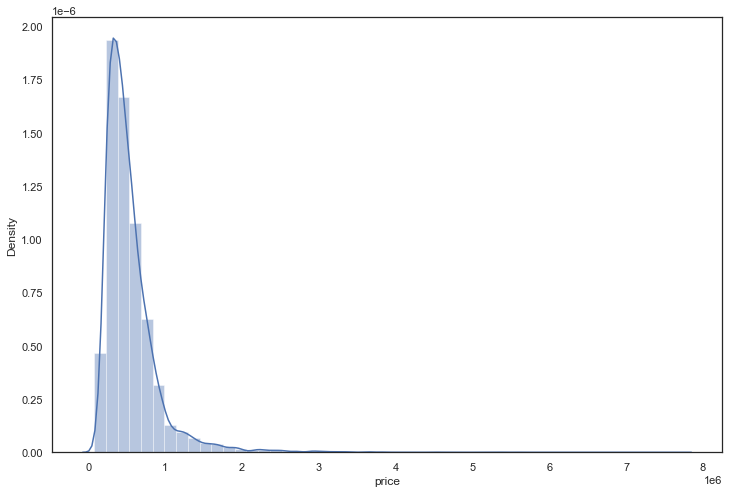

In [10]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

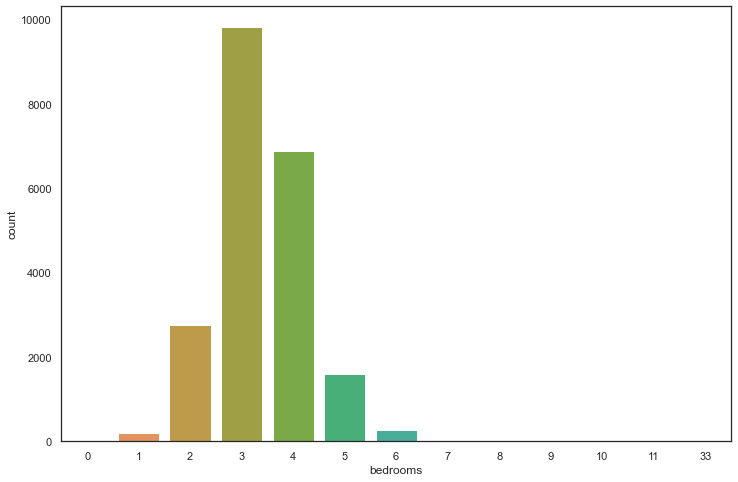

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(df.bedrooms)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

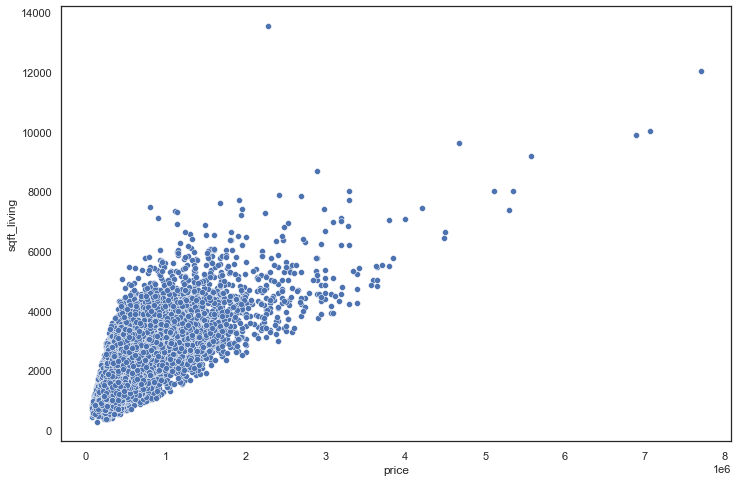

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:>

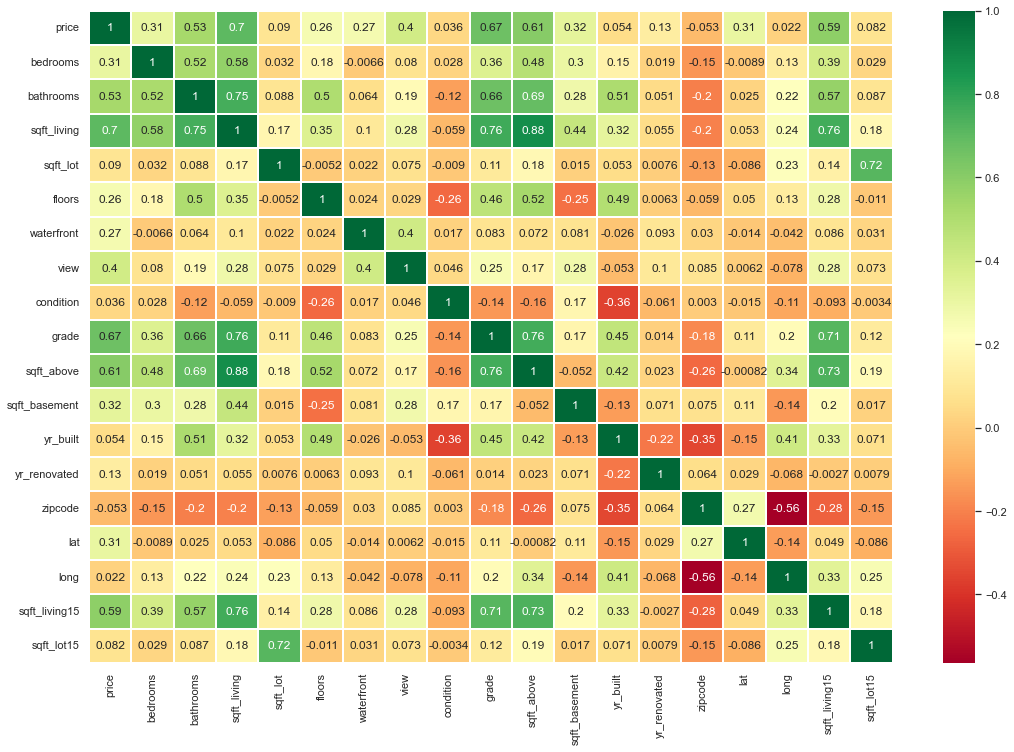

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap ='RdYlGn', linewidths = 0.3, annot = True)

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date', axis=1)
df = df.drop('zipcode', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [15]:
X = df.drop('price', axis=1)
y = df['price']

In [16]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [17]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 6ms/step - loss: 419694903296.0000 - val_loss: 442218381312.0000
Epoch 2/500
119/119 [==============================] - 1s 4ms/step - loss: 419101835264.0000 - val_loss: 440121589760.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 410866089984.0000 - val_loss: 420463476736.0000
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 367519236096.0000 - val_loss: 343033741312.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 255504121856.0000 - val_loss: 199710425088.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 133891964928.0000 - val_loss: 115856220160.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 98337636352.0000 - val_loss: 107399602176.0000
Epoch 8/500
119/119 [==============================] - 0s 3ms/step - loss: 95255609344.0000 - val_loss: 105264054272.0000
Epoch 9/500
119/11

119/119 [==============================] - 0s 2ms/step - loss: 36953878528.0000 - val_loss: 41913008128.0000
Epoch 69/500
119/119 [==============================] - 0s 2ms/step - loss: 36822155264.0000 - val_loss: 41729839104.0000
Epoch 70/500
119/119 [==============================] - 0s 2ms/step - loss: 36653326336.0000 - val_loss: 41605193728.0000
Epoch 71/500
119/119 [==============================] - 0s 2ms/step - loss: 36462354432.0000 - val_loss: 41475334144.0000
Epoch 72/500
119/119 [==============================] - 0s 2ms/step - loss: 36315951104.0000 - val_loss: 41291419648.0000
Epoch 73/500
119/119 [==============================] - 0s 2ms/step - loss: 36164050944.0000 - val_loss: 41170317312.0000
Epoch 74/500
119/119 [==============================] - 0s 2ms/step - loss: 36039004160.0000 - val_loss: 41046642688.0000
Epoch 75/500
119/119 [==============================] - 0s 2ms/step - loss: 35903516672.0000 - val_loss: 40910675968.0000
Epoch 76/500
119/119 [===============

119/119 [==============================] - 0s 2ms/step - loss: 32035264512.0000 - val_loss: 37674123264.0000
Epoch 135/500
119/119 [==============================] - 0s 2ms/step - loss: 32002600960.0000 - val_loss: 37709922304.0000
Epoch 136/500
119/119 [==============================] - 0s 2ms/step - loss: 31947964416.0000 - val_loss: 37548912640.0000
Epoch 137/500
119/119 [==============================] - 0s 2ms/step - loss: 31932227584.0000 - val_loss: 37533671424.0000
Epoch 138/500
119/119 [==============================] - 0s 2ms/step - loss: 31875004416.0000 - val_loss: 37478240256.0000
Epoch 139/500
119/119 [==============================] - 0s 2ms/step - loss: 31840720896.0000 - val_loss: 37459701760.0000
Epoch 140/500
119/119 [==============================] - 0s 2ms/step - loss: 31779778560.0000 - val_loss: 37492551680.0000
Epoch 141/500
119/119 [==============================] - 0s 2ms/step - loss: 31794094080.0000 - val_loss: 37405310976.0000
Epoch 142/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30004379648.0000 - val_loss: 36078923776.0000
Epoch 201/500
119/119 [==============================] - 0s 2ms/step - loss: 30025060352.0000 - val_loss: 36033183744.0000
Epoch 202/500
119/119 [==============================] - 0s 2ms/step - loss: 29970810880.0000 - val_loss: 36019621888.0000
Epoch 203/500
119/119 [==============================] - 0s 2ms/step - loss: 29934739456.0000 - val_loss: 35994480640.0000
Epoch 204/500
119/119 [==============================] - 0s 2ms/step - loss: 29964644352.0000 - val_loss: 35973513216.0000
Epoch 205/500
119/119 [==============================] - 0s 2ms/step - loss: 29905494016.0000 - val_loss: 36037058560.0000
Epoch 206/500
119/119 [==============================] - 0s 2ms/step - loss: 29889079296.0000 - val_loss: 35969208320.0000
Epoch 207/500
119/119 [==============================] - 0s 2ms/step - loss: 29867077632.0000 - val_loss: 35935985664.0000
Epoch 208/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28929396736.0000 - val_loss: 34940538880.0000
Epoch 267/500
119/119 [==============================] - 0s 2ms/step - loss: 28971843584.0000 - val_loss: 34764775424.0000
Epoch 268/500
119/119 [==============================] - 0s 2ms/step - loss: 28946890752.0000 - val_loss: 34809384960.0000
Epoch 269/500
119/119 [==============================] - 0s 2ms/step - loss: 28975624192.0000 - val_loss: 34749153280.0000
Epoch 270/500
119/119 [==============================] - 0s 2ms/step - loss: 28878004224.0000 - val_loss: 34947289088.0000
Epoch 271/500
119/119 [==============================] - 0s 2ms/step - loss: 28919042048.0000 - val_loss: 34822987776.0000
Epoch 272/500
119/119 [==============================] - 0s 2ms/step - loss: 28910909440.0000 - val_loss: 34761773056.0000
Epoch 273/500
119/119 [==============================] - 0s 2ms/step - loss: 28851892224.0000 - val_loss: 34669948928.0000
Epoch 274/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28219293696.0000 - val_loss: 33804644352.0000
Epoch 333/500
119/119 [==============================] - 0s 2ms/step - loss: 28206577664.0000 - val_loss: 33810511872.0000
Epoch 334/500
119/119 [==============================] - 0s 2ms/step - loss: 28210722816.0000 - val_loss: 33818640384.0000
Epoch 335/500
119/119 [==============================] - 0s 2ms/step - loss: 28223852544.0000 - val_loss: 33755363328.0000
Epoch 336/500
119/119 [==============================] - 0s 2ms/step - loss: 28212729856.0000 - val_loss: 33672312832.0000
Epoch 337/500
119/119 [==============================] - 0s 2ms/step - loss: 28223584256.0000 - val_loss: 33703223296.0000
Epoch 338/500
119/119 [==============================] - 0s 2ms/step - loss: 28187967488.0000 - val_loss: 33728026624.0000
Epoch 339/500
119/119 [==============================] - 0s 2ms/step - loss: 28183834624.0000 - val_loss: 33630107648.0000
Epoch 340/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26751086592.0000 - val_loss: 31753721856.0000
Epoch 399/500
119/119 [==============================] - 0s 2ms/step - loss: 26671474688.0000 - val_loss: 31775252480.0000
Epoch 400/500
119/119 [==============================] - 0s 2ms/step - loss: 26700648448.0000 - val_loss: 31700430848.0000
Epoch 401/500
119/119 [==============================] - 0s 2ms/step - loss: 26661912576.0000 - val_loss: 31751757824.0000
Epoch 402/500
119/119 [==============================] - 0s 2ms/step - loss: 26582269952.0000 - val_loss: 31593332736.0000
Epoch 403/500
119/119 [==============================] - 0s 2ms/step - loss: 26555107328.0000 - val_loss: 31634272256.0000
Epoch 404/500
119/119 [==============================] - 0s 2ms/step - loss: 26535413760.0000 - val_loss: 31500361728.0000
Epoch 405/500
119/119 [==============================] - 0s 2ms/step - loss: 26499520512.0000 - val_loss: 31483504640.0000
Epoch 406/500
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 23980255232.0000 - val_loss: 28561088512.0000
Epoch 465/500
119/119 [==============================] - 0s 2ms/step - loss: 23964839936.0000 - val_loss: 28531525632.0000
Epoch 466/500
119/119 [==============================] - 0s 2ms/step - loss: 23894579200.0000 - val_loss: 28521089024.0000
Epoch 467/500
119/119 [==============================] - 0s 2ms/step - loss: 23889741824.0000 - val_loss: 28454021120.0000
Epoch 468/500
119/119 [==============================] - 0s 2ms/step - loss: 23801260032.0000 - val_loss: 28441896960.0000
Epoch 469/500
119/119 [==============================] - 0s 2ms/step - loss: 23803301888.0000 - val_loss: 28384223232.0000
Epoch 470/500
119/119 [==============================] - 0s 2ms/step - loss: 23793088512.0000 - val_loss: 28316563456.0000
Epoch 471/500
119/119 [==============================] - 0s 2ms/step - loss: 23801202688.0000 - val_loss: 28234799104.0000
Epoch 472/500
119/119 [=======

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

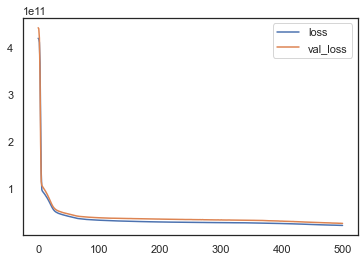

In [24]:
losses.plot()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [26]:
predictions = model.predict(X_test)

In [27]:
mean_absolute_error(y_test, predictions)

93679.89893752892

In [28]:
mean_squared_error(y_test, predictions)

26956861232.340107

In [29]:
np.sqrt(mean_squared_error(y_test, predictions))

164185.44768748572

In [30]:
explained_variance_score(y_test, predictions)

0.8132762464666141

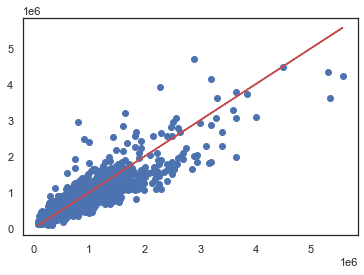

In [31]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [32]:
single_house = df.drop('price',axis=1).iloc[0]

In [33]:
single_house = sc.transform(single_house.values.reshape(-1, 19))

In [34]:
model.predict(single_house)

array([[286645.72]], dtype=float32)